In [2]:
#Imports

from pyspark.sql.functions import when, col
from pyspark.sql.functions import regexp_replace
from pyspark.sql import functions as F
from pyspark.sql.functions import month, year, date_format
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Leitura dos arquivos de medicamentos

path_to_read = "gs://silver-ans/medicamentos"
df = spark.read.parquet(path_to_read)

In [4]:
df.limit(10).toPandas()

,ID_EVENTO_ATENCAO_SAUDE,UF_PRESTADOR,CD_PROCEDIMENTO,CD_TABELA_REFERENCIA,QT_ITEM_EVENTO_INFORMADO,VL_ITEM_EVENTO_INFORMADO,VL_ITEM_PAGO_FORNECEDOR,IND_PACOTE,IND_TABELA_PROPRIA,DT_REALIZACAO
0,4330281918,ES,90377150,20,50,"2445,98",0,0,0,2022-03-01
1,4330307233,ES,90294432,20,420,"26,6",0,0,0,2022-03-01
2,4256487873,ES,90429028,20,3,"486,51",0,0,0,2022-03-01
3,4256487876,ES,90321049,20,4,"7954,64",0,0,0,2022-03-01
4,4256487878,ES,90066235,20,3,75,0,0,0,2022-03-01
5,4330249806,ES,90349075,20,400,14763,0,0,0,2022-03-01
6,4330224679,ES,90349083,20,500,17976,0,0,0,2022-03-01
7,4378805302,ES,90208650,20,1,"90,04",0,0,0,2022-03-01
8,4378781609,ES,90208650,20,1,"90,04",0,0,0,2022-03-01
9,4378781683,ES,90208650,20,1,"90,04",0,0,0,2022-03-01


In [5]:
df.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: long (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- CD_PROCEDIMENTO: string (nullable = true)
 |-- CD_TABELA_REFERENCIA: integer (nullable = true)
 |-- QT_ITEM_EVENTO_INFORMADO: string (nullable = true)
 |-- VL_ITEM_EVENTO_INFORMADO: string (nullable = true)
 |-- VL_ITEM_PAGO_FORNECEDOR: string (nullable = true)
 |-- IND_PACOTE: integer (nullable = true)
 |-- IND_TABELA_PROPRIA: integer (nullable = true)
 |-- DT_REALIZACAO: timestamp (nullable = true)



In [6]:
unique_count = df.select("ID_EVENTO_ATENCAO_SAUDE").distinct().count()

print(f"O número de IDs únicos é: {unique_count}")


O número de IDs únicos é: 2153712


In [7]:
Arimidex = "90015363"
df_arimidex = df.filter(df.CD_PROCEDIMENTO.isin(Arimidex))

In [8]:
number_of_rows = df_arimidex.count()
print(number_of_rows)

42314


In [9]:
# Ajustando Schema"

# Substituindo a vírgula por um ponto
df_arimidex = df_arimidex.withColumn("QT_ITEM_EVENTO_INFORMADO", regexp_replace(col("QT_ITEM_EVENTO_INFORMADO"), ",", "."))
df_arimidex = df_arimidex.withColumn("VL_ITEM_EVENTO_INFORMADO", regexp_replace(col("VL_ITEM_EVENTO_INFORMADO"), ",", "."))
df_arimidex = df_arimidex.withColumn("VL_ITEM_PAGO_FORNECEDOR", regexp_replace(col("VL_ITEM_PAGO_FORNECEDOR"), ",", "."))

# Convertendo para float ou double após ajustar os decimais
df_arimidex = df_arimidex.withColumn("QT_ITEM_EVENTO_INFORMADO", col("QT_ITEM_EVENTO_INFORMADO").cast("float")) # ou cast("double")
df_arimidex = df_arimidex.withColumn("VL_ITEM_EVENTO_INFORMADO", col("VL_ITEM_EVENTO_INFORMADO").cast("float"))
df_arimidex = df_arimidex.withColumn("VL_ITEM_PAGO_FORNECEDOR", col("VL_ITEM_PAGO_FORNECEDOR").cast("float"))

In [10]:
df_arimidex.limit(10).toPandas()

,ID_EVENTO_ATENCAO_SAUDE,UF_PRESTADOR,CD_PROCEDIMENTO,CD_TABELA_REFERENCIA,QT_ITEM_EVENTO_INFORMADO,VL_ITEM_EVENTO_INFORMADO,VL_ITEM_PAGO_FORNECEDOR,IND_PACOTE,IND_TABELA_PROPRIA,DT_REALIZACAO
0,4256487875,ES,90015363,20,3.0,1700.010010,0.000000,0,0,2022-03-01
1,4517174116,ES,90015363,20,84.0,2688.000000,0.000000,0,0,2022-03-01
2,4328285552,ES,90015363,20,56.0,994.299988,0.000000,0,0,2022-03-01
3,4317335673,ES,90015363,20,28.0,806.400024,0.000000,0,0,2022-03-01
4,4768125546,ES,90015363,20,3.0,1492.050049,1492.050049,0,0,2022-03-01
5,4293210291,ES,90015363,20,28.0,954.239990,0.000000,0,0,2022-03-01
6,4351581540,ES,90015363,20,28.0,826.840027,0.000000,0,0,2022-03-01
7,4351581534,ES,90015363,20,28.0,826.840027,0.000000,0,0,2022-03-01
8,4031628108,SC,90015363,20,28.0,574.010010,0.000000,0,0,2021-10-01
9,4043050033,SC,90015363,20,28.0,560.659973,0.000000,0,0,2021-10-01


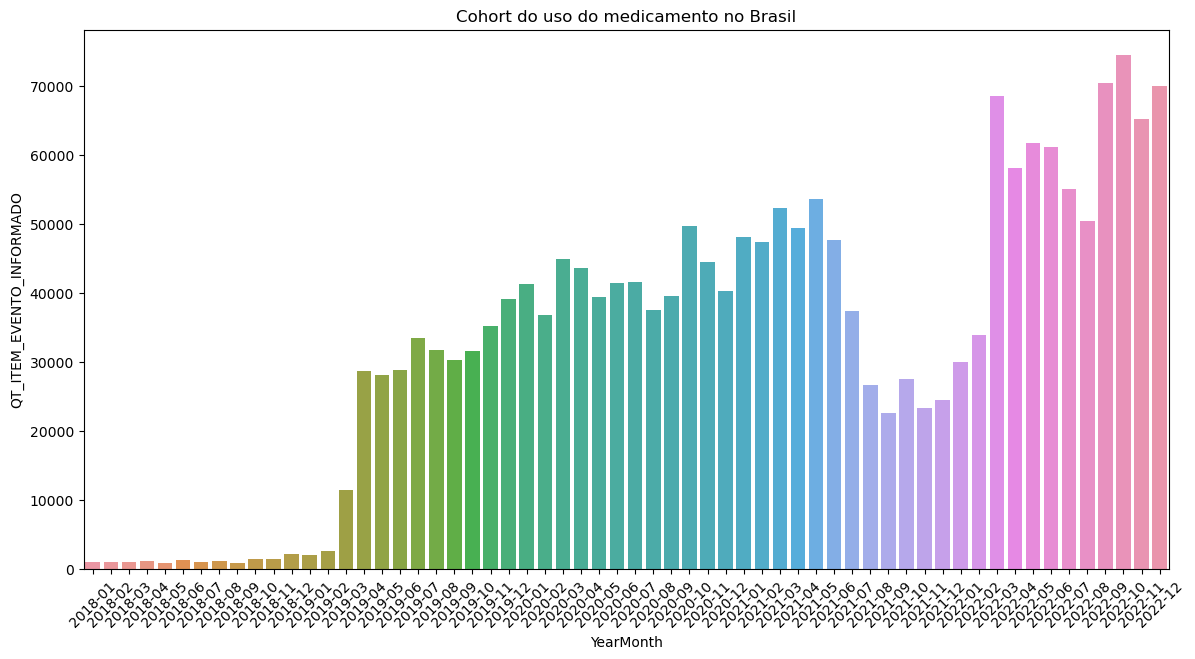

In [11]:
def plot_medication_use_brazil_monthly(df, timestamp_column, qty_column):
    """
    Plota a quantidade mensal de uso do medicamento ao longo do tempo para todo o Brasil.

    Args:
    - df: Spark DataFrame com os dados
    - timestamp_column: Nome da coluna de timestamp
    - qty_column: Nome da coluna da quantidade de medicamento

    Retorna:
    - Plot do gráfico
    """

    pdf = df.toPandas()

    pdf['YearMonth'] = pdf[timestamp_column].dt.to_period('M')

    grouped = pdf.groupby('YearMonth')[qty_column].sum().reset_index()

    # Plot
    plt.figure(figsize=(14, 7))
    sns.barplot(data=grouped, x='YearMonth', y=qty_column)
    plt.title('Cohort do uso do medicamento no Brasil')
    plt.xticks(rotation=45)  
    plt.show()

plot_medication_use_brazil_monthly(df_arimidex, 'DT_REALIZACAO', 'QT_ITEM_EVENTO_INFORMADO')



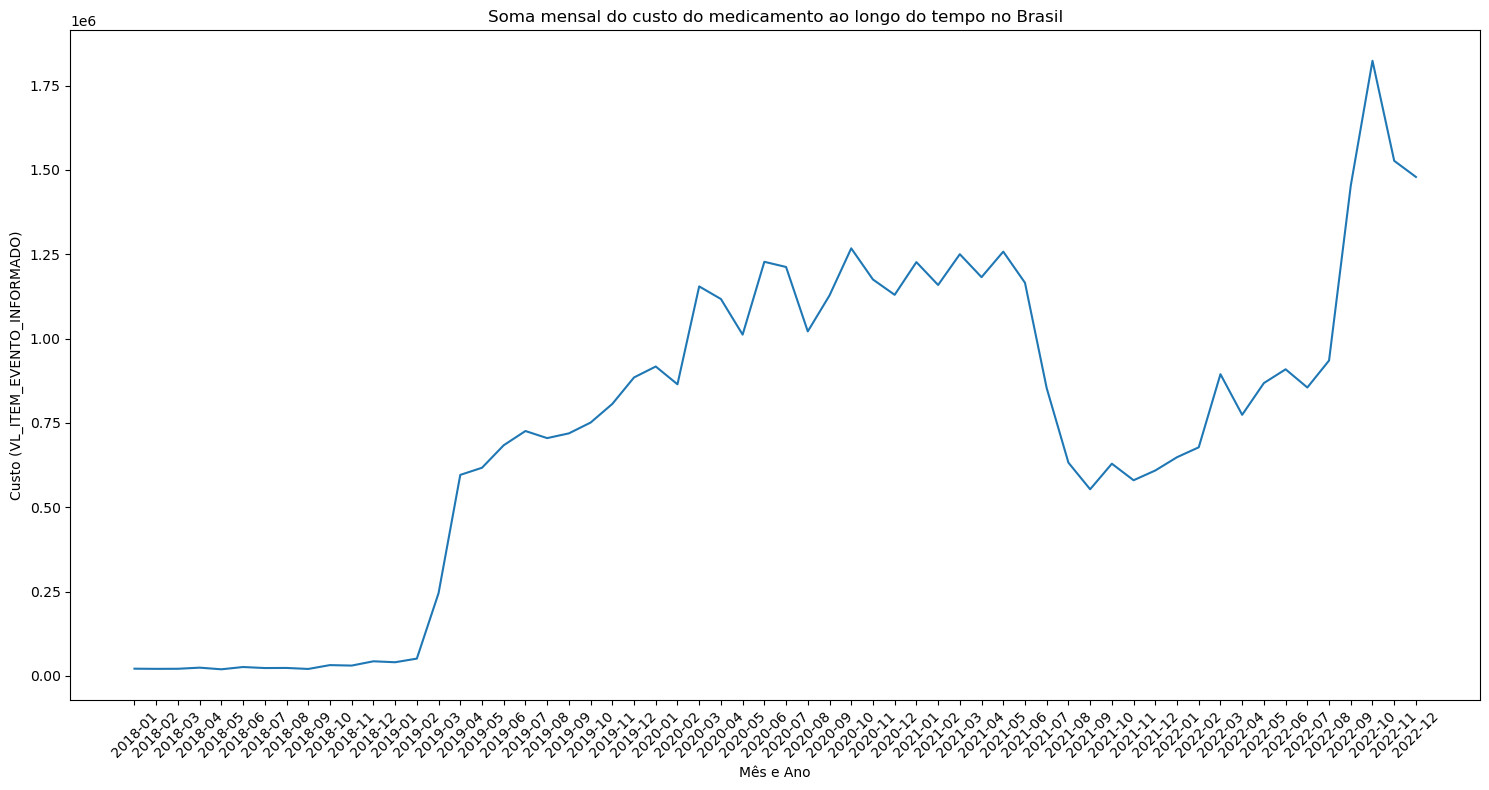

In [12]:
def plot_monthly_cost_brazil_spark(df):
    
    df_with_month_year = df.withColumn("YEAR", year("DT_REALIZACAO")).withColumn("MONTH", month("DT_REALIZACAO"))
    
    data_grouped = df_with_month_year.groupBy('YEAR', 'MONTH').agg(F.sum('VL_ITEM_EVENTO_INFORMADO').alias('Total_Cost'))
    
    data_grouped = data_grouped.withColumn("MONTH_YEAR", date_format(F.concat_ws("-", "YEAR", "MONTH", F.lit("01")), "yyyy-MM"))

    data_grouped_pd = data_grouped.toPandas()
    data_grouped_pd.sort_values(by='MONTH_YEAR', inplace=True)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=data_grouped_pd, x='MONTH_YEAR', y='Total_Cost')
    plt.title('Soma mensal do custo do medicamento ao longo do tempo no Brasil')
    plt.ylabel('Custo (VL_ITEM_EVENTO_INFORMADO)')
    plt.xlabel('Mês e Ano')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_monthly_cost_brazil_spark(df_arimidex)

In [13]:
path_to_read_dos = "gs://processed-ans/bronze"
df_dos = spark.read.parquet(path_to_read_dos)

In [14]:
df_dos.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: long (nullable = true)
 |-- ID_PLANO: integer (nullable = true)
 |-- FAIXA_ETARIA: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- CD_MUNICIPIO_BENEFICIARIO: integer (nullable = true)
 |-- PORTE: string (nullable = true)
 |-- CD_MODALIDADE: integer (nullable = true)
 |-- NM_MODALIDADE: string (nullable = true)
 |-- CD_MUNICIPIO_PRESTADOR: integer (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- CD_CARATER_ATENDIMENTO: integer (nullable = true)
 |-- TIPO_ATENDIMENTO: integer (nullable = true)
 |-- CD_MOTIVO_SAIDA: integer (nullable = true)
 |-- CBO: string (nullable = true)
 |-- TIPO_CONSULTA: integer (nullable = true)
 |-- IND_ACIDENTE_DOENCA: integer (nullable = true)
 |-- LG_VALOR_PREESTABELECIDO: integer (nullable = true)
 |-- DT_REALIZACAO: timestamp (nullable = true)



In [15]:
df_dos = df_dos.withColumnRenamed("DT_REALIZACAO", "DT_REALIZACAO_DOS")

In [16]:
df_dos = df_dos.withColumnRenamed("UF_PRESTADOR", "UF_PRESTADOR_DOS")

In [17]:
merged_df = df_arimidex.join(df_dos, on="ID_EVENTO_ATENCAO_SAUDE", how="inner")

In [18]:
merged_df.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: long (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- CD_PROCEDIMENTO: string (nullable = true)
 |-- CD_TABELA_REFERENCIA: integer (nullable = true)
 |-- QT_ITEM_EVENTO_INFORMADO: float (nullable = true)
 |-- VL_ITEM_EVENTO_INFORMADO: float (nullable = true)
 |-- VL_ITEM_PAGO_FORNECEDOR: float (nullable = true)
 |-- IND_PACOTE: integer (nullable = true)
 |-- IND_TABELA_PROPRIA: integer (nullable = true)
 |-- DT_REALIZACAO: timestamp (nullable = true)
 |-- ID_PLANO: integer (nullable = true)
 |-- FAIXA_ETARIA: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- CD_MUNICIPIO_BENEFICIARIO: integer (nullable = true)
 |-- PORTE: string (nullable = true)
 |-- CD_MODALIDADE: integer (nullable = true)
 |-- NM_MODALIDADE: string (nullable = true)
 |-- CD_MUNICIPIO_PRESTADOR: integer (nullable = true)
 |-- UF_PRESTADOR_DOS: string (nullable = true)
 |-- CD_CARATER_ATENDIMENTO: integer (nullable = true)
 |-- TIPO_ATENDIMENTO: inte

In [19]:
number_of_rows_merged = merged_df.count()
print(number_of_rows_merged)

42314


In [20]:
merged_df.limit(10).toPandas()

23/10/25 10:26:38 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,ID_EVENTO_ATENCAO_SAUDE,UF_PRESTADOR,CD_PROCEDIMENTO,CD_TABELA_REFERENCIA,QT_ITEM_EVENTO_INFORMADO,VL_ITEM_EVENTO_INFORMADO,VL_ITEM_PAGO_FORNECEDOR,IND_PACOTE,IND_TABELA_PROPRIA,DT_REALIZACAO,...,CD_MUNICIPIO_PRESTADOR,UF_PRESTADOR_DOS,CD_CARATER_ATENDIMENTO,TIPO_ATENDIMENTO,CD_MOTIVO_SAIDA,CBO,TIPO_CONSULTA,IND_ACIDENTE_DOENCA,LG_VALOR_PREESTABELECIDO,DT_REALIZACAO_DOS
0,2580551237,SP,90015363,20,30.0,498.299988,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
1,2580551271,SP,90015363,20,30.0,498.299988,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
2,2580551302,SP,90015363,20,30.0,498.299988,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
3,2580551300,SP,90015363,20,30.0,498.299988,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
4,2580480712,SP,90015363,20,30.0,598.200012,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
5,3077911194,SP,90015363,20,84.0,1524.979980,0.0,0,0,2019-04-01,...,355240,SP,1,8,11,225121,1,NaN,0,2019-04-01
6,2580551337,SP,90015363,20,30.0,477.600006,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
7,2526849728,SP,90015363,20,30.0,477.600006,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
8,2526849204,SP,90015363,20,30.0,477.600006,0.0,0,0,2019-04-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-04-01
9,2568583532,SP,90015363,20,30.0,417.600006,0.0,0,0,2019-01-01,...,355030,SP,1,5,11,225121,1,NaN,0,2019-01-01


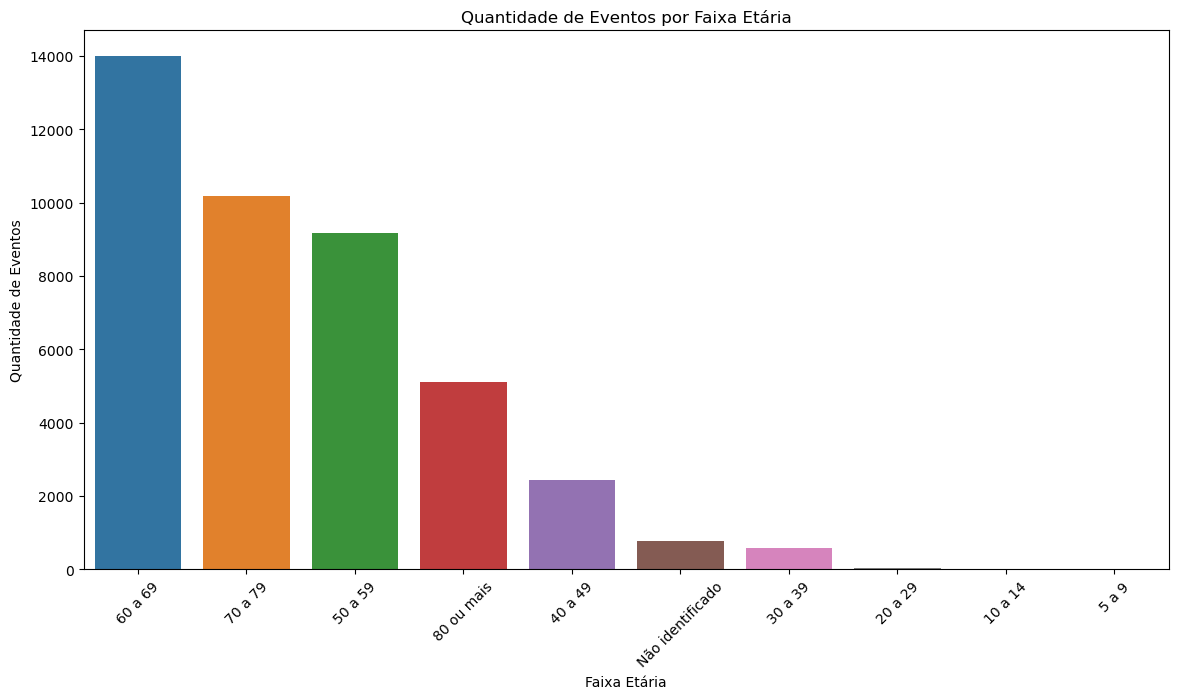

In [21]:

grouped_data = merged_df.groupBy("FAIXA_ETARIA").agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).withColumnRenamed("count(ID_EVENTO_ATENCAO_SAUDE)", "count_events")
pdf_grouped_data = grouped_data.orderBy("count_events", ascending=False).toPandas()

plt.figure(figsize=(14, 7))
sns.barplot(data=pdf_grouped_data, x="FAIXA_ETARIA", y="count_events")
plt.title('Quantidade de Eventos por Faixa Etária')
plt.xticks(rotation=45)  
plt.ylabel('Quantidade de Eventos')
plt.xlabel('Faixa Etária')
plt.show()


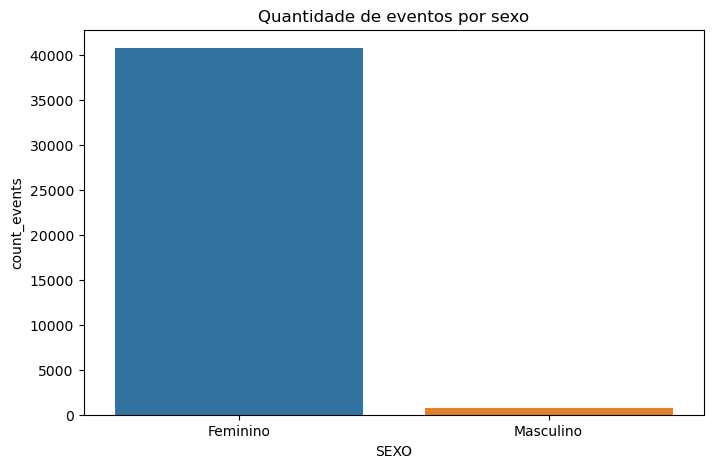

In [22]:
grouped_data = merged_df.groupBy("SEXO").agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).withColumnRenamed("count(ID_EVENTO_ATENCAO_SAUDE)", "count_events")


pdf_grouped_data = grouped_data.orderBy("count_events", ascending=False).toPandas()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=pdf_grouped_data, x="SEXO", y="count_events")
plt.title('Quantidade de eventos por sexo')
plt.show()


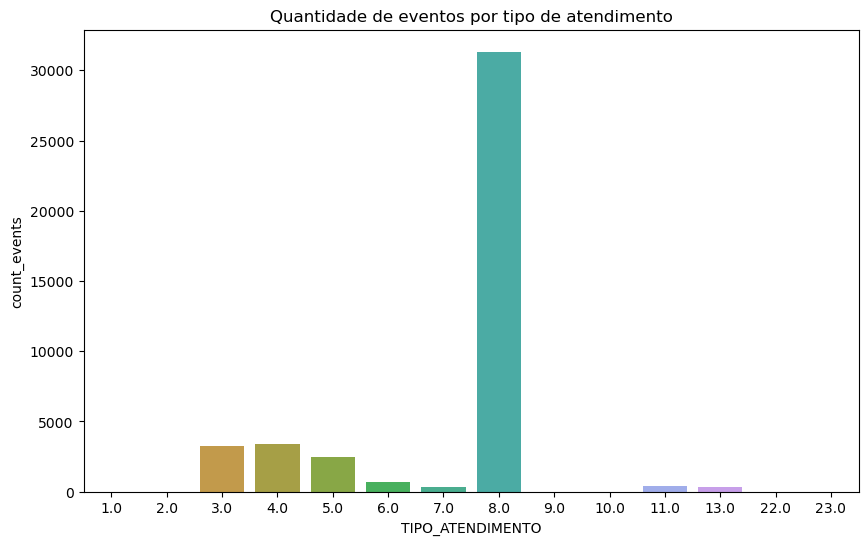

In [23]:
grouped_data = merged_df.groupBy("TIPO_ATENDIMENTO").agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).withColumnRenamed("count(ID_EVENTO_ATENCAO_SAUDE)", "count_events")

pdf_grouped_data = grouped_data.orderBy("count_events", ascending=False).toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=pdf_grouped_data, x="TIPO_ATENDIMENTO", y="count_events")
plt.title('Quantidade de eventos por tipo de atendimento')
plt.show()

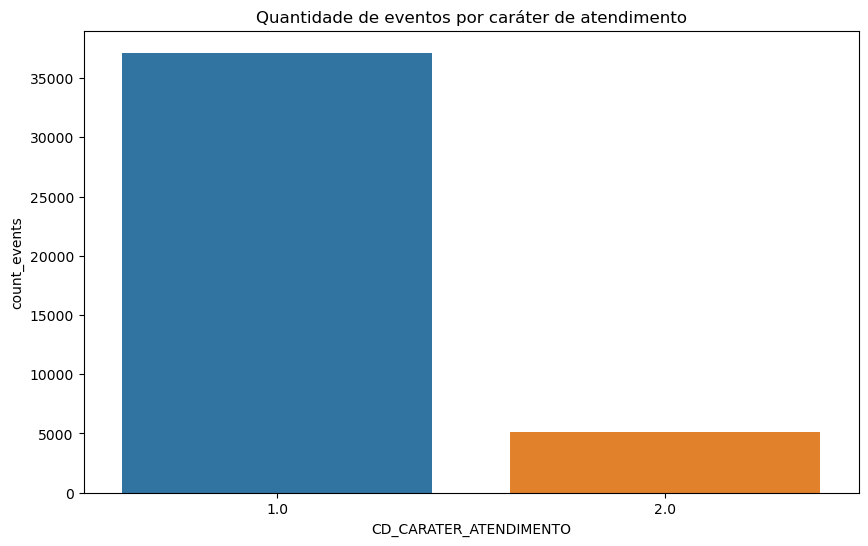

In [24]:
grouped_data = merged_df.groupBy("CD_CARATER_ATENDIMENTO").agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).withColumnRenamed("count(ID_EVENTO_ATENCAO_SAUDE)", "count_events")

pdf_grouped_data = grouped_data.orderBy("count_events", ascending=False).toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=pdf_grouped_data, x="CD_CARATER_ATENDIMENTO", y="count_events")
plt.title('Quantidade de eventos por caráter de atendimento')
plt.show()

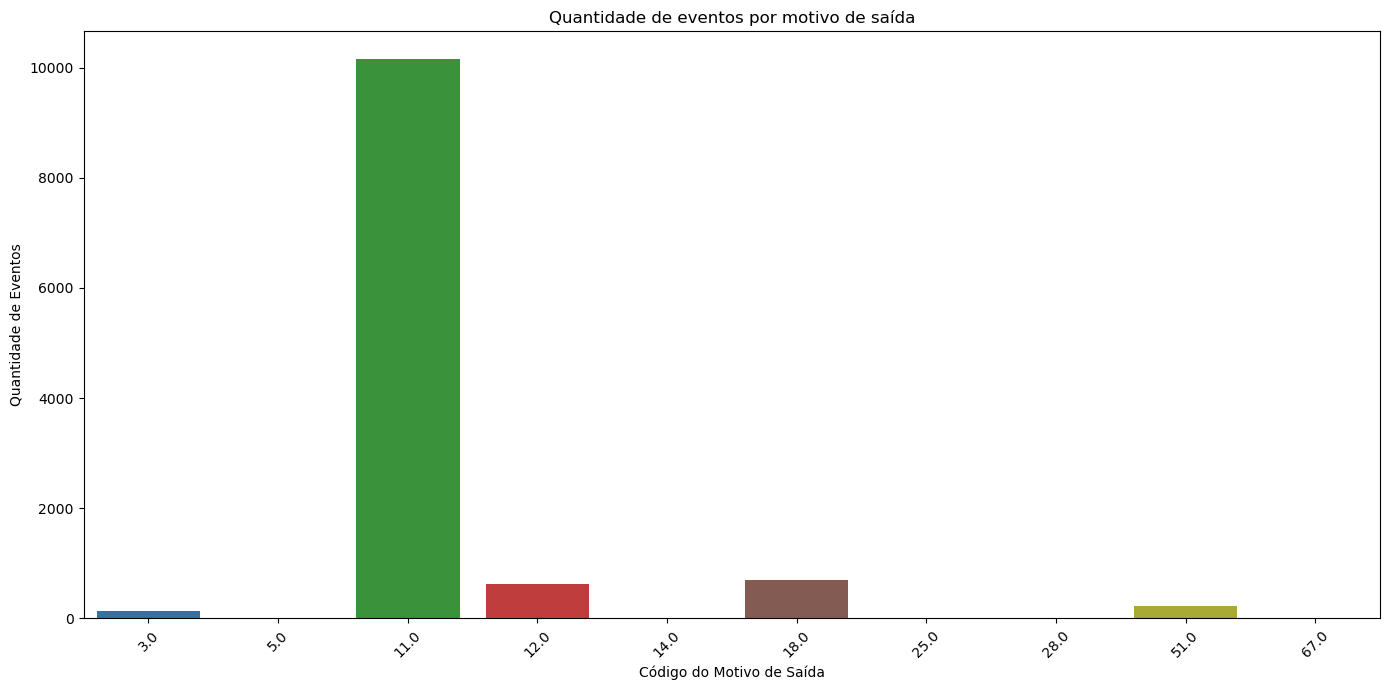

In [25]:
grouped_data = merged_df.groupBy("CD_MOTIVO_SAIDA").agg(F.count("ID_EVENTO_ATENCAO_SAUDE").alias("count_events"))

pdf_grouped_data = grouped_data.orderBy("count_events", ascending=False).toPandas()

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=pdf_grouped_data, x="CD_MOTIVO_SAIDA", y="count_events")
plt.title('Quantidade de eventos por motivo de saída')
plt.xlabel('Código do Motivo de Saída')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


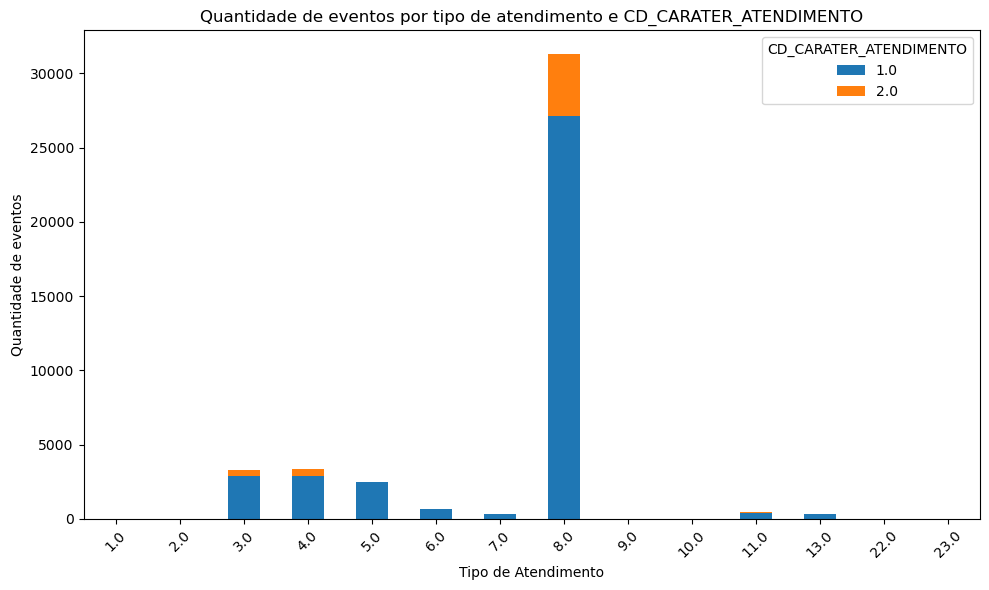

In [36]:
def plot_stacked_bar_atendimento(spark_df):

    df = spark_df.toPandas()

    grouped = df.groupby(['TIPO_ATENDIMENTO', 'CD_CARATER_ATENDIMENTO']).agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).unstack()

    df_grouped = grouped['ID_EVENTO_ATENCAO_SAUDE'].reset_index().fillna(0)

    ax = df_grouped.set_index('TIPO_ATENDIMENTO').plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title('Quantidade de eventos por tipo de atendimento e CD_CARATER_ATENDIMENTO')
    plt.ylabel('Quantidade de eventos')
    plt.xlabel('Tipo de Atendimento')
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.legend(title='CD_CARATER_ATENDIMENTO')
    plt.show()

plot_stacked_bar_atendimento(merged_df)


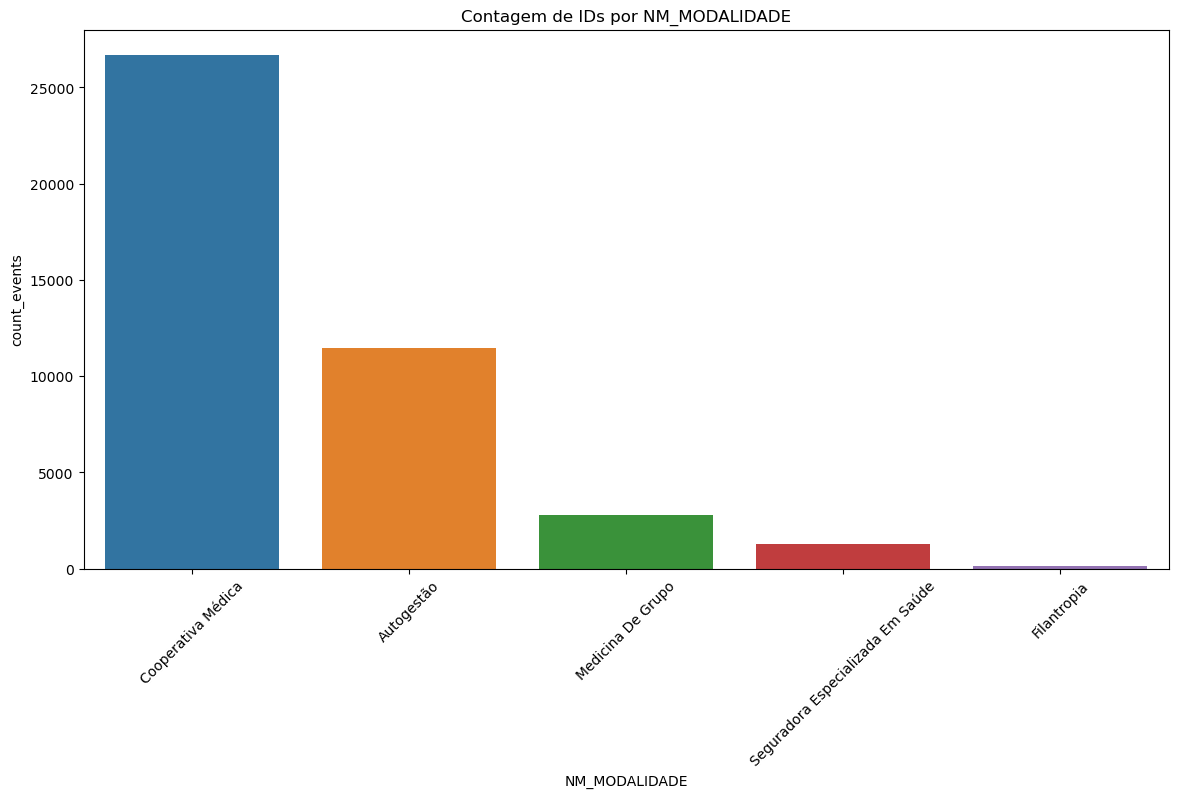

In [26]:
grouped_nm_modalidade = merged_df.groupBy("NM_MODALIDADE").agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).withColumnRenamed("count(ID_EVENTO_ATENCAO_SAUDE)", "count_events")

pdf_nm_modalidade = grouped_nm_modalidade.orderBy("count_events", ascending=False).toPandas()

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=pdf_nm_modalidade, x="NM_MODALIDADE", y="count_events")
plt.title('Contagem de IDs por NM_MODALIDADE')
plt.xticks(rotation=45)  
plt.show()

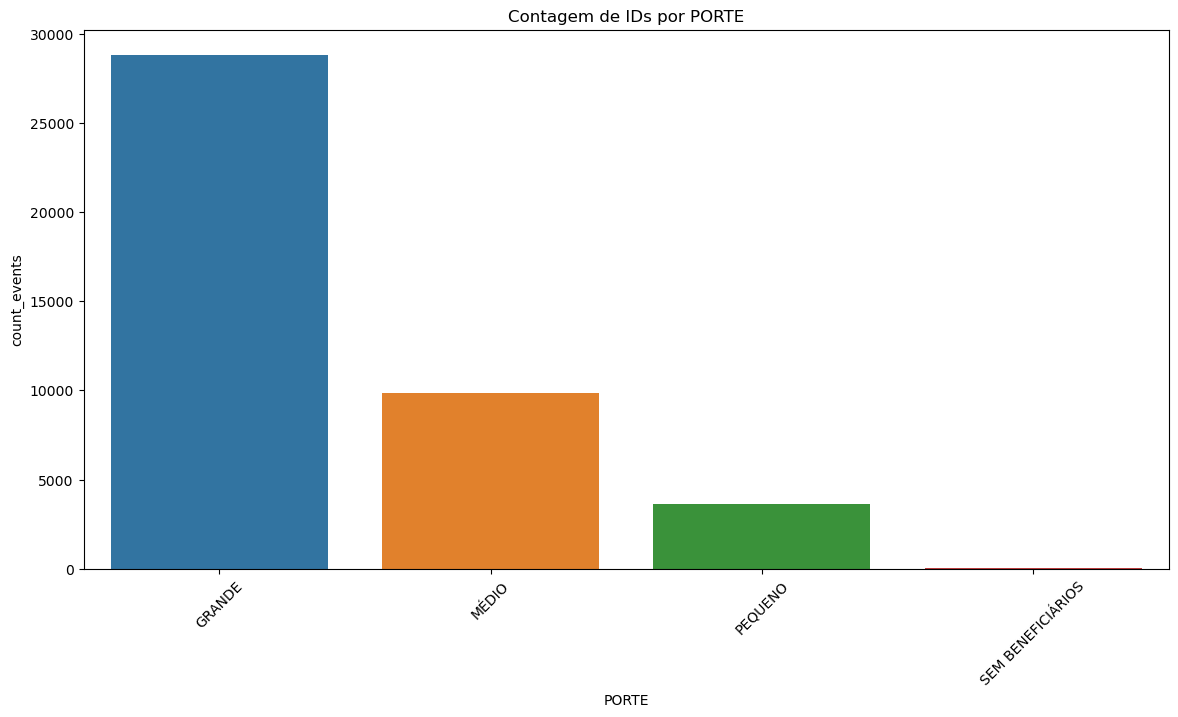

In [27]:
grouped_porte = merged_df.groupBy("PORTE").agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).withColumnRenamed("count(ID_EVENTO_ATENCAO_SAUDE)", "count_events")

pdf_porte = grouped_porte.orderBy("count_events", ascending=False).toPandas()

plt.figure(figsize=(14, 7))
sns.barplot(data=pdf_porte, x="PORTE", y="count_events")
plt.title('Contagem de IDs por PORTE')
plt.xticks(rotation=45) 
plt.show()


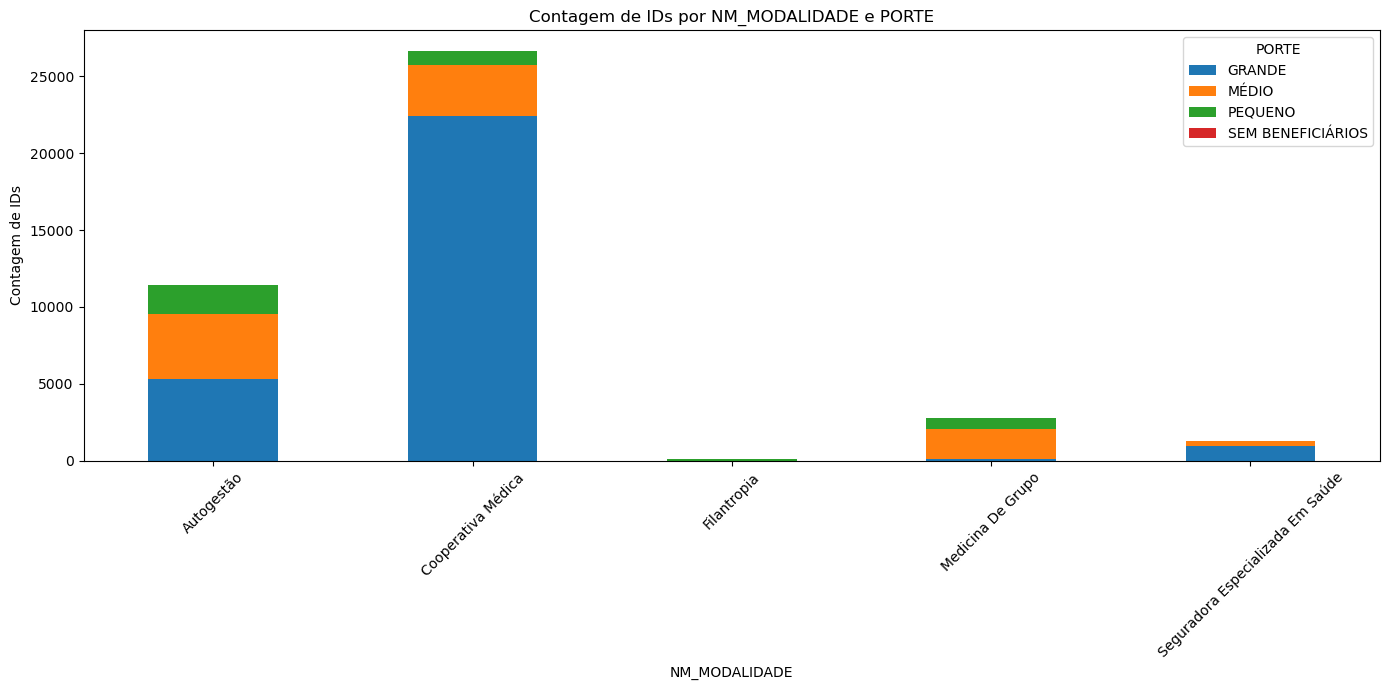

In [28]:
grouped = merged_df.groupBy(['NM_MODALIDADE', 'PORTE']).agg(F.count('ID_EVENTO_ATENCAO_SAUDE').alias('count_events'))

pdf_grouped = grouped.toPandas()

pivot_df = pdf_grouped.pivot(index='NM_MODALIDADE', columns='PORTE', values='count_events').fillna(0)

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Contagem de IDs por NM_MODALIDADE e PORTE')
plt.ylabel('Contagem de IDs')
plt.xlabel('NM_MODALIDADE')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.legend(title='PORTE')
plt.show()


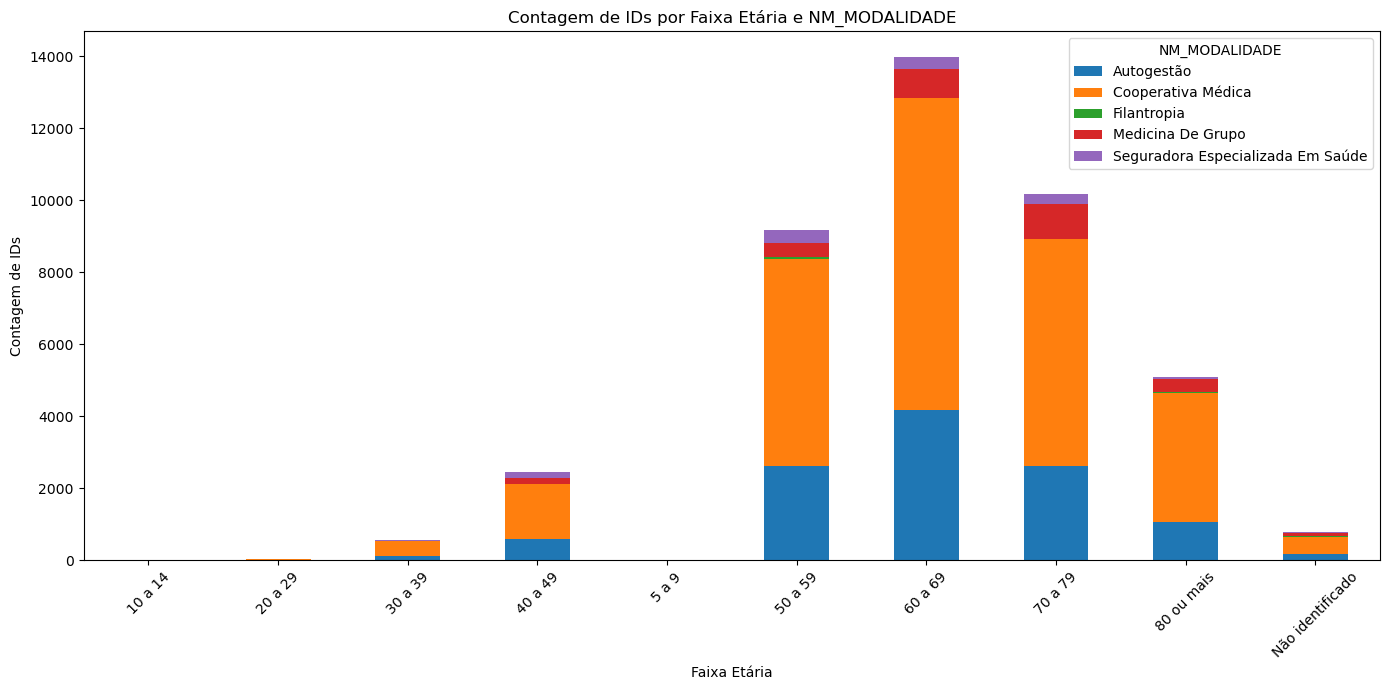

In [34]:
def plot_stacked_bar_faixa_modalidade(spark_df):
    df = spark_df.toPandas()

    grouped = df.groupby(['FAIXA_ETARIA', 'NM_MODALIDADE']).agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).unstack()

    df_grouped = grouped['ID_EVENTO_ATENCAO_SAUDE'].reset_index().fillna(0)

    ax = df_grouped.set_index('FAIXA_ETARIA').plot(kind='bar', stacked=True, figsize=(14,7))
    plt.title('Contagem de IDs por Faixa Etária e NM_MODALIDADE')
    plt.ylabel('Contagem de IDs')
    plt.xlabel('Faixa Etária')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.legend(title='NM_MODALIDADE')
    plt.show()

plot_stacked_bar_faixa_modalidade(merged_df)


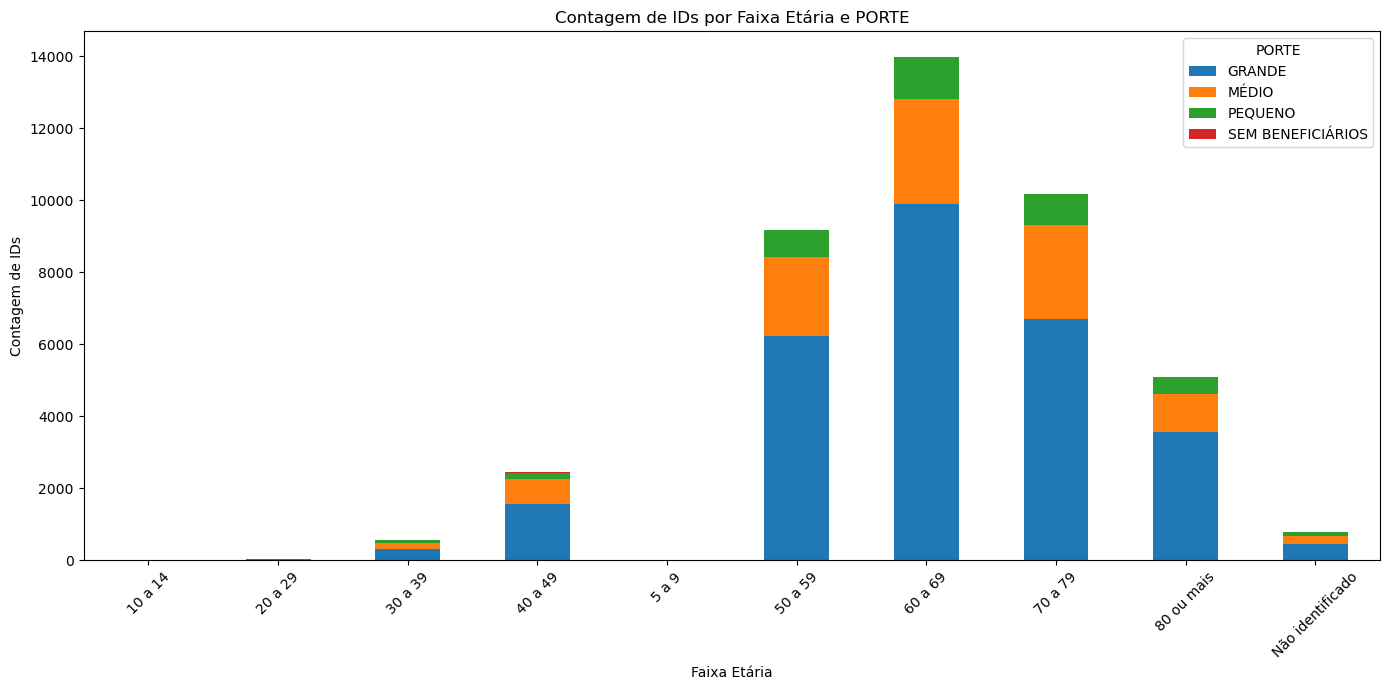

In [30]:

def plot_stacked_bar(spark_df):

    df = spark_df.toPandas()

    grouped = df.groupby(['FAIXA_ETARIA', 'PORTE']).agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).unstack()

    df_grouped = grouped['ID_EVENTO_ATENCAO_SAUDE'].reset_index().fillna(0)

    ax = df_grouped.set_index('FAIXA_ETARIA').plot(kind='bar', stacked=True, figsize=(14,7))
    plt.title('Contagem de IDs por Faixa Etária e PORTE')
    plt.ylabel('Contagem de IDs')
    plt.xlabel('Faixa Etária')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

plot_stacked_bar(merged_df)



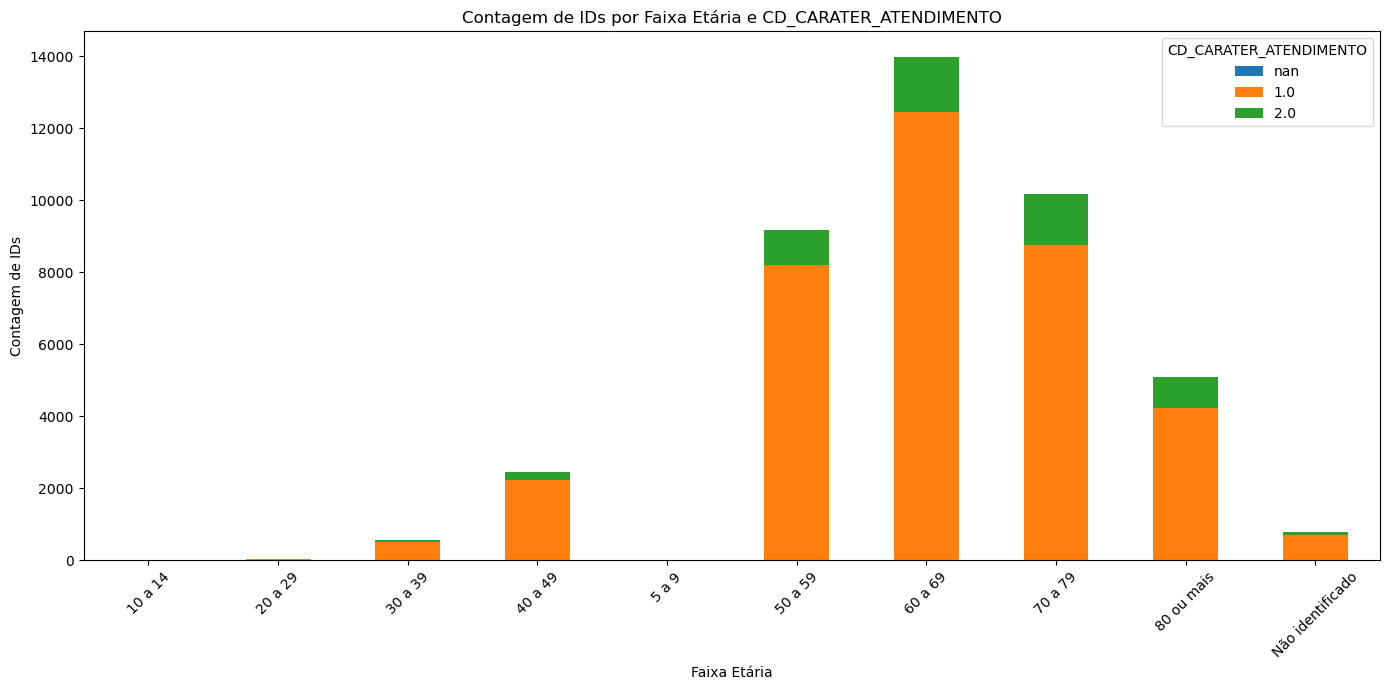

In [31]:
def plot_stacked_bar_atendimento(df):

    grouped = df.groupBy(['FAIXA_ETARIA', 'CD_CARATER_ATENDIMENTO']).agg(F.count('ID_EVENTO_ATENCAO_SAUDE').alias('count')).orderBy('FAIXA_ETARIA')
    
    pdf_grouped = grouped.toPandas()

    pivot_df = pdf_grouped.pivot(index='FAIXA_ETARIA', columns='CD_CARATER_ATENDIMENTO', values='count').fillna(0)
    
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14,7))
    plt.title('Contagem de IDs por Faixa Etária e CD_CARATER_ATENDIMENTO')
    plt.ylabel('Contagem de IDs')
    plt.xlabel('Faixa Etária')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.legend(title='CD_CARATER_ATENDIMENTO')
    plt.show()

plot_stacked_bar_atendimento(merged_df)


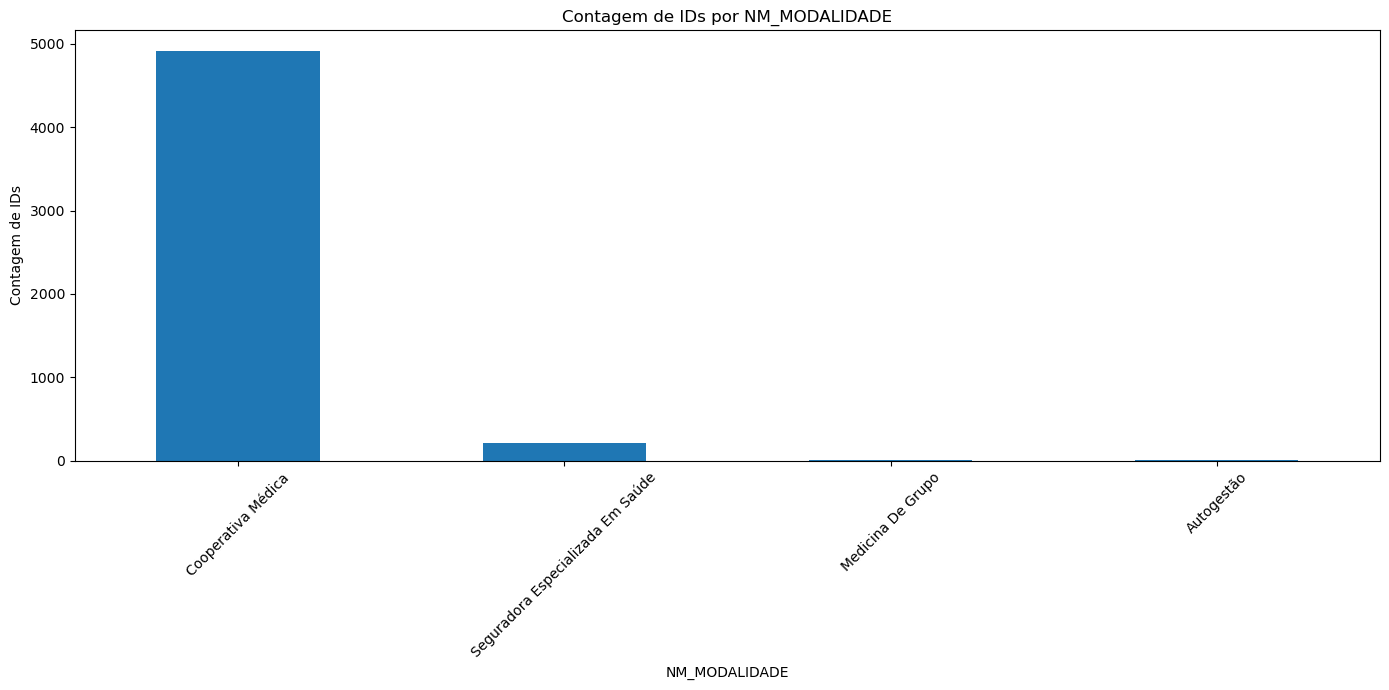

In [32]:
def plot_bar_ids_modalidade(df):
    df_filtered = df.filter(df.CD_CARATER_ATENDIMENTO == 2)
    
    grouped = df_filtered.groupBy('NM_MODALIDADE').agg(F.count('ID_EVENTO_ATENCAO_SAUDE').alias('count')).orderBy('count', ascending=False)
    
    pdf_grouped = grouped.toPandas()
    
    pdf_grouped.plot(x='NM_MODALIDADE', y='count', kind='bar', legend=None, figsize=(14,7))
    plt.title('Contagem de IDs por NM_MODALIDADE')
    plt.ylabel('Contagem de IDs')
    plt.xlabel('NM_MODALIDADE')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_bar_ids_modalidade(merged_df)


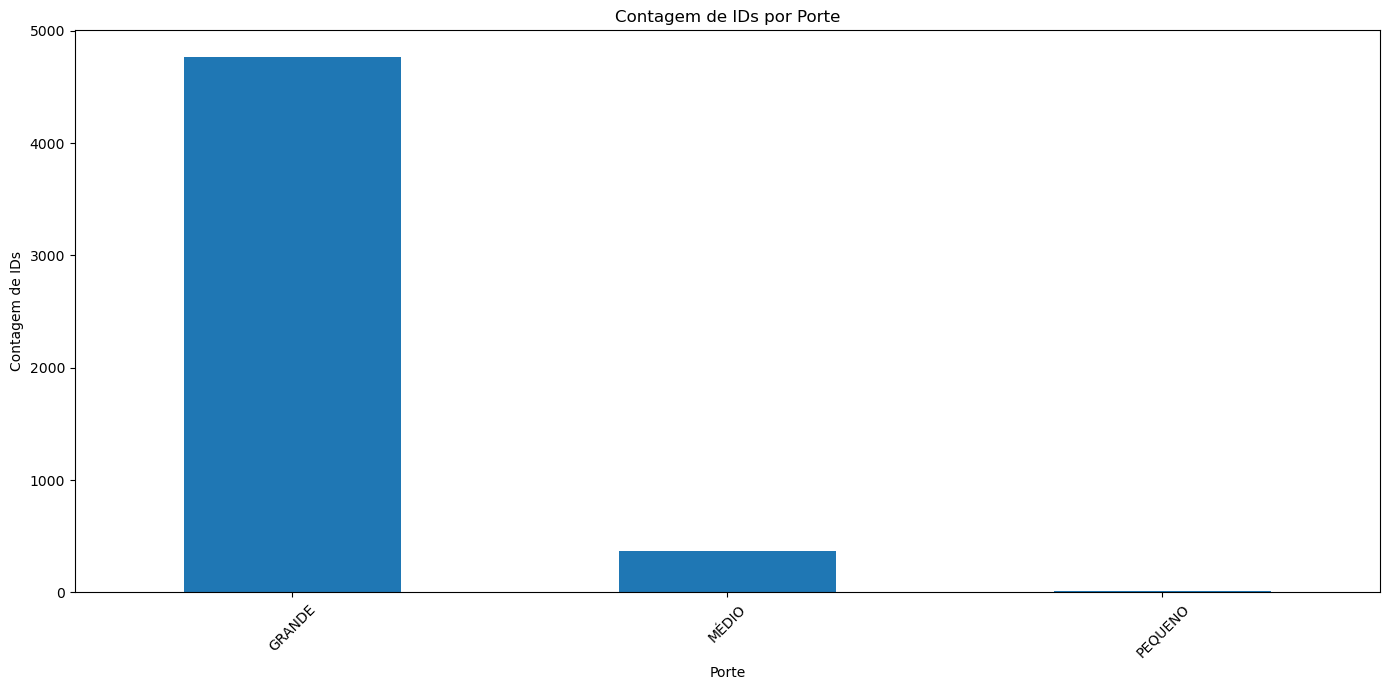

In [33]:
def plot_bar_ids_porte(df):
    
    df_filtered = df.filter(df.CD_CARATER_ATENDIMENTO == 2)
    
    grouped = df_filtered.groupBy('porte').agg(F.count('ID_EVENTO_ATENCAO_SAUDE').alias('count')).orderBy('count', ascending=False)
    
    pdf_grouped = grouped.toPandas()
    
    # Plotando o gráfico de barras
    pdf_grouped.plot(x='porte', y='count', kind='bar', legend=None, figsize=(14,7))
    plt.title('Contagem de IDs por Porte')
    plt.ylabel('Contagem de IDs')
    plt.xlabel('Porte')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_bar_ids_porte(merged_df)


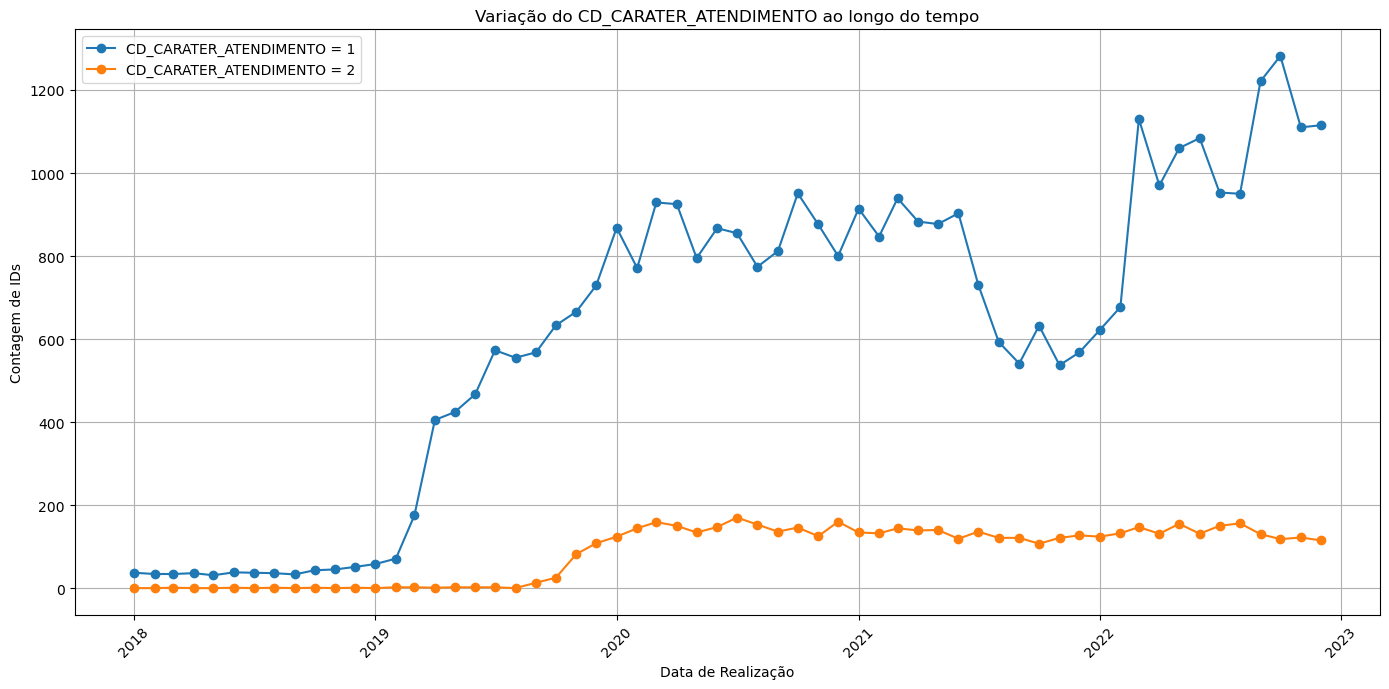

In [35]:
def plot_line_chart_time_series(spark_df):
    df = spark_df.toPandas()

    df = df[df['CD_CARATER_ATENDIMENTO'].isin([1, 2])]

    grouped = df.groupby(['DT_REALIZACAO', 'CD_CARATER_ATENDIMENTO']).agg({"ID_EVENTO_ATENCAO_SAUDE": "count"}).unstack()

    df_grouped = grouped['ID_EVENTO_ATENCAO_SAUDE'].reset_index().fillna(0)

    plt.figure(figsize=(14, 7))
    plt.plot(df_grouped['DT_REALIZACAO'], df_grouped[1], label='CD_CARATER_ATENDIMENTO = 1', marker='o')
    plt.plot(df_grouped['DT_REALIZACAO'], df_grouped[2], label='CD_CARATER_ATENDIMENTO = 2', marker='o')
    plt.title('Variação do CD_CARATER_ATENDIMENTO ao longo do tempo')
    plt.ylabel('Contagem de IDs')
    plt.xlabel('Data de Realização')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.grid(True)
    plt.show()

plot_line_chart_time_series(merged_df)
